<a href="https://colab.research.google.com/github/shebbir007/Python_Learning_Basics/blob/main/Class_08_ML%2C_Eva_%26_Confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/datasets/Breast_Cancer_Wisconsin_Dataset.csv')

# No need run just showed

In [ ]:
#Basic exploration
print("Dataset Shape:", df.shape)
print("\nlirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())
print("\nCheck for missing values:")
print(df.isnull().sum())
print("\nTarget variable distribution:")
print(df['Outcome'].value_counts())

In [10]:
print("Reading the real cancer dataset...")
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('/content/drive/MyDrive/datasets/Breast_Cancer_Wisconsin_Dataset.csv')
# Show first few patients
print("\nFirst 5 patients in our dataset:")
print(data[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'area_mean']].head())
#Understand diagnosis column
diagnosis_counts = data['diagnosis'].value_counts()
print(f"M (Malignant Dangerous Cancer): {diagnosis_counts['M']} patients")
print(f"B (Benign Harmless Cancer): {diagnosis_counts['B']} patients")
print(f"Total patients: {len(data)} patients")

Reading the real cancer dataset...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

First 5 patients in our dataset:
         id diagnosis  radius_mean  texture_mean  area_mean
0    842302         M        17.99         10.38     1001.0
1    842517         M        20.57         17.77     1326.0
2  84300903         M        19.69         21.25     1203.0
3  84348301         M        11.42         20.38      386.1
4  84358402         M        20.29         14.34     1297.0
M (Malignant Dangerous Cancer): 212 patients
B (Benign Harmless Cancer): 357 patients
Total patients: 569 patients


# **Data Preparing**

In [13]:
print("Converting (Malignant Cancer) and (Benign Cancer)")
#Convert diagnosis to numbers

data['diagnosis_numeric'] = data['diagnosis'].map({'M': 1, 'B': 0})
# Select only the most important features (make it simple!)
important_features = [
    'radius_mean', #Size of tumor
    'texture_mean',#Surface texture
    'area_mean',#Area of tumor
    'smoothness_mean',#How smooth the surface is
    'compactness_mean' #How compact the tumor is
]
# Create simple dataset
X = data[important_features] # Patient measurements
y = data['diagnosis_numeric'] # Malignant (1) or Benign (0)
print(f"X (measurements): {X.shape}")
print(f"y (diagnosis): {y.shape}")

Converting (Malignant Cancer) and (Benign Cancer)
X (measurements): (569, 5)
y (diagnosis): (569,)


# **Data Split**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=20
)
print(f"Training: {len(X_train)} patients (computer will learn from these)")
print(f"Testing: {len(X_test)} patients (computer will be tested on these)")
#Show some training examples
print("\nTraining Examples (Computer learns from these):")
print(X_train.head())

Training: 455 patients (computer will learn from these)
Testing: 114 patients (computer will be tested on these)

Training Examples (Computer learns from these):
     radius_mean  texture_mean  area_mean  smoothness_mean  compactness_mean
412        9.397         21.68      268.8          0.07969           0.06053
461       27.420         26.27     2501.0          0.10840           0.19880
532       13.680         16.33      575.5          0.09277           0.07255
495       14.870         20.21      680.9          0.09587           0.08345
13        15.850         23.95      782.7          0.08401           0.10020


# **Model Train**

In [17]:
#Create our Skill Morph model
skillmorph_doctor = DecisionTreeClassifier(
    max_depth=4,
    #Keep it simple not too complex
    random_state=20
)
print("Teaching Skill Morph doctor with training data...")
#Train the model
skillmorph_doctor.fit(X_train, y_train)
print("Skill Morph doctor training completed!")


#Check accuracy on training data
train_score = skillmorph_doctor.score(X_train, y_train)
print(f"Training accuracy: {train_score:.1%}")


#Additionally Check accuracy on test data....or can use below format.
test_score = skillmorph_doctor.score (X_test, y_test)
print(f"Test accuracy: {test_score:.1%}")

Teaching Skill Morph doctor with training data...
Skill Morph doctor training completed!
Training accuracy: 94.9%
Test accuracy: 90.4%


## **Check Testing**

In [19]:
print("Now let's see how good our Skill Morph doctor is...")
#Make predictions
predictions = skillmorph_doctor.predict(X_test)
print("Skill Morph doctor made predictions for all test patients!")
#Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nSkill Morph Doctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")

Now let's see how good our Skill Morph doctor is...
Skill Morph doctor made predictions for all test patients!

Skill Morph Doctor Accuracy: 0.904 (90.4%)
GOOD! Our Skill Morph doctor performs well!


# **Confusion metrix**

Confusion Matrix:
[[62  4]
 [ 7 41]]

Correct: 103
Wrong: 11


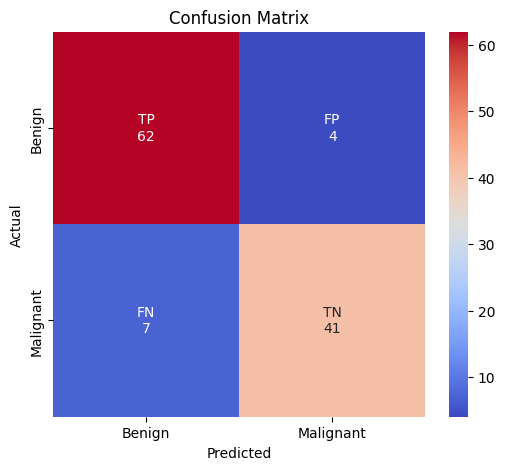

In [27]:
#Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

cm_labels = [
    [f'TP\n{cm[0,0]}', f'FP\n{cm[0,1]}'],
    [f'FN\n{cm[1,0]}', f'TN\n{cm[1,1]}']
]

#Print it
print("Confusion Matrix:")
print(cm)
print(f"\nCorrect: {cm[0,0] + cm[1,1]}")
print(f"Wrong: {cm[0,1] + cm[1,0]}")
#Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=cm_labels, fmt='', cmap="coolwarm",
xticklabels=['Benign', 'Malignant'],
yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

## **Detail Performance** evaluation metrices

Accuracy: 0.90
Precision: 0.91
Recall: 0.85
F1-Score: 0.88


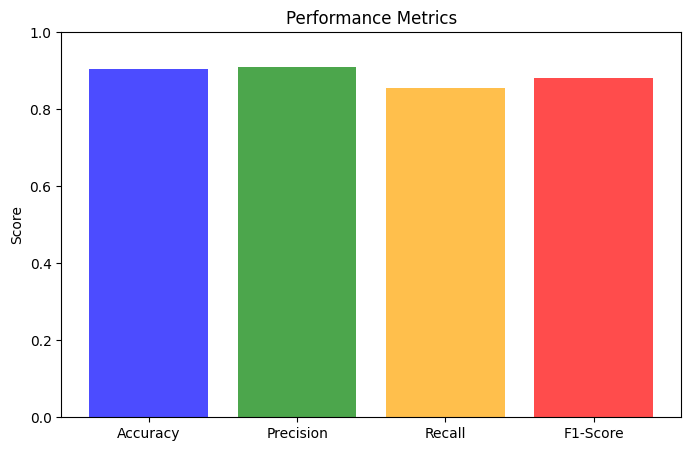

In [29]:
#Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
#Print them
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
#Simple bar chart
plt.figure(figsize=(8, 5))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values= [accuracy, precision, recall, f1]
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()